# Sampling, Trace and Forest plots

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
tornados = pd.read_csv("combined_tornado_weather.csv")
pd.set_option('display.max_columns', None)
tornados.head(10)

,Unnamed: 0,om,yr,mo,dy,date,time,tz,st,stf,stn,mag,inj,fat,loss,closs,slat,slon,elat,elon,len,wid,ns,sn,sg,f1,f2,f3,f4,fc,weather_date,weather_time,wind_speed,visibility_distance,temperature,temperature_dewpoint,air_pressure,weather_date_2,weather_time_2,wind_speed_2,visibility_distance_2,temperature_2,temperature_dewpoint_2,air_pressure_2
0,1,617023,2018,12,31,2018-12-31,13:43:00,3,IN,18,0,1,0,0,50000.0,0.0,38.1813,-86.8863,38.2006,-86.8585,2.01,50,1,1,1,147,0,0,0,0,20181231,1256,46,16093,111,106,10102,20181231,1132,67,16093,100,90,99999
1,2,617024,2018,12,31,2018-12-31,14:38:00,3,IN,18,0,1,0,0,20000.0,0.0,38.0935,-86.0869,38.1000,-86.0470,2.20,140,1,1,1,61,0,0,0,0,20181231,1326,26,0,90,90,10120,20181231,1239,31,6437,80,80,10124
2,3,617013,2018,12,20,2018-12-20,07:45:00,3,FL,12,0,0,0,0,5000.0,0.0,27.7532,-81.7702,27.7424,-81.7680,0.76,75,1,1,1,105,0,0,0,0,20181220,615,9999,16093,160,9999,99999,20181220,515,9999,16093,160,9999,99999
3,4,617014,2018,12,20,2018-12-20,08:14:00,3,FL,12,0,0,1,0,45000.0,0.0,27.8287,-81.6011,27.8297,-81.6010,0.07,30,1,1,1,105,0,0,0,0,20181220,715,9999,16093,160,9999,99999,20181220,615,9999,16093,160,9999,99999
4,5,617015,2018,12,20,2018-12-20,11:28:00,3,FL,12,0,0,0,0,30000.0,0.0,27.0070,-82.1342,27.0209,-82.1286,1.02,100,1,1,1,15,0,0,0,0,20181220,1053,51,16093,194,178,10085,20181220,953,62,16093,189,172,10087
5,6,617011,2018,12,18,2018-12-18,15:50:00,3,WA,53,0,2,0,0,1180000.0,0.0,47.5070,-122.6395,47.5181,-122.6158,1.35,285,1,1,1,35,0,0,0,0,20181218,1456,57,16093,83,78,10031,20181218,1333,57,16093,80,80,99999
6,7,617010,2018,12,9,2018-12-09,10:54:00,3,FL,12,0,0,0,0,40000.0,0.0,28.5429,-81.2304,28.5447,-81.2296,0.13,50,1,1,1,95,0,0,0,0,20181209,953,46,16093,200,189,10146,20181209,815,41,16093,200,183,99999
7,8,617000,2018,12,2,2018-12-02,01:49:00,3,AL,1,0,0,0,0,15000.0,0.0,31.2374,-85.4872,31.2448,-85.4721,1.03,75,1,1,1,69,0,0,0,0,20181202,17,41,16093,194,183,99999,20181201,2323,51,8047,194,183,99999
8,9,617001,2018,12,2,2018-12-02,08:22:00,3,GA,13,0,0,0,0,10000.0,0.0,31.3390,-83.6184,31.3595,-83.5979,1.86,600,1,1,1,277,0,0,0,0,20181202,715,41,16093,9999,9999,99999,20181202,615,21,16093,9999,9999,99999
9,10,617003,2018,12,2,2018-12-02,13:30:00,3,GA,13,0,0,0,0,2000.0,0.0,31.3100,-82.8600,31.3114,-82.8573,0.19,50,1,1,1,3,0,0,0,0,20181202,1216,26,16093,220,210,99999,20181202,1116,31,8047,210,210,99999


Get the number of tornados by class

In [4]:
tornados['mag'].value_counts()

 0    2585
 1    1774
 2     449
 3     113
-9      45
 4      30
 5       4
Name: mag, dtype: int64

Replace coded na's with actual na's

In [5]:
replace_map3 = {'mag': {-9: np.nan},
                'visibility_distance':{999999: np.nan},
                'wind_speed':{9999: np.nan},
                'temperature':{9999:np.nan},
                'temperature_dewpoint': {9999:np.nan },
                'air_pressure': {99999: np.nan},
                'visibility_distance_2':{999999: np.nan},
                'wind_speed_2':{9999: np.nan},
                'temperature_2':{9999:np.nan},
                'temperature_dewpoint_2': {9999:np.nan },
                'air_pressure_2': {99999: np.nan}
               }

tornados_clean = tornados.replace(replace_map3)
# Remove unlabeled tornados
tornados_clean = tornados_clean.dropna(subset=['mag'])

In [6]:
tornados_clean.head(5)

,Unnamed: 0,om,yr,mo,dy,date,time,tz,st,stf,stn,mag,inj,fat,loss,closs,slat,slon,elat,elon,len,wid,ns,sn,sg,f1,f2,f3,f4,fc,weather_date,weather_time,wind_speed,visibility_distance,temperature,temperature_dewpoint,air_pressure,weather_date_2,weather_time_2,wind_speed_2,visibility_distance_2,temperature_2,temperature_dewpoint_2,air_pressure_2
0,1,617023,2018,12,31,2018-12-31,13:43:00,3,IN,18,0,1.0,0,0,50000.0,0.0,38.1813,-86.8863,38.2006,-86.8585,2.01,50,1,1,1,147,0,0,0,0,20181231,1256,46.0,16093.0,111.0,106.0,10102.0,20181231,1132,67.0,16093.0,100.0,90.0,NaN
1,2,617024,2018,12,31,2018-12-31,14:38:00,3,IN,18,0,1.0,0,0,20000.0,0.0,38.0935,-86.0869,38.1000,-86.0470,2.20,140,1,1,1,61,0,0,0,0,20181231,1326,26.0,0.0,90.0,90.0,10120.0,20181231,1239,31.0,6437.0,80.0,80.0,10124.0
2,3,617013,2018,12,20,2018-12-20,07:45:00,3,FL,12,0,0.0,0,0,5000.0,0.0,27.7532,-81.7702,27.7424,-81.7680,0.76,75,1,1,1,105,0,0,0,0,20181220,615,NaN,16093.0,160.0,NaN,NaN,20181220,515,NaN,16093.0,160.0,NaN,NaN
3,4,617014,2018,12,20,2018-12-20,08:14:00,3,FL,12,0,0.0,1,0,45000.0,0.0,27.8287,-81.6011,27.8297,-81.6010,0.07,30,1,1,1,105,0,0,0,0,20181220,715,NaN,16093.0,160.0,NaN,NaN,20181220,615,NaN,16093.0,160.0,NaN,NaN
4,5,617015,2018,12,20,2018-12-20,11:28:00,3,FL,12,0,0.0,0,0,30000.0,0.0,27.0070,-82.1342,27.0209,-82.1286,1.02,100,1,1,1,15,0,0,0,0,20181220,1053,51.0,16093.0,194.0,178.0,10085.0,20181220,953,62.0,16093.0,189.0,172.0,10087.0


In [7]:
# Bin the time into 6 bins
hours = pd.to_datetime(tornados['time'], format='%H:%M:%S').dt.hour
tornados_clean['time_binned'] = pd.cut(hours, 
                    bins=[0,4,8,12, 16, 20, 24], 
                    include_lowest=True, 
                    labels=['1','2','3','4','5','6'])
tornados_clean_nonan = tornados_clean.dropna()
tornados_clean.head()

,Unnamed: 0,om,yr,mo,dy,date,time,tz,st,stf,stn,mag,inj,fat,loss,closs,slat,slon,elat,elon,len,wid,ns,sn,sg,f1,f2,f3,f4,fc,weather_date,weather_time,wind_speed,visibility_distance,temperature,temperature_dewpoint,air_pressure,weather_date_2,weather_time_2,wind_speed_2,visibility_distance_2,temperature_2,temperature_dewpoint_2,air_pressure_2,time_binned
0,1,617023,2018,12,31,2018-12-31,13:43:00,3,IN,18,0,1.0,0,0,50000.0,0.0,38.1813,-86.8863,38.2006,-86.8585,2.01,50,1,1,1,147,0,0,0,0,20181231,1256,46.0,16093.0,111.0,106.0,10102.0,20181231,1132,67.0,16093.0,100.0,90.0,NaN,4
1,2,617024,2018,12,31,2018-12-31,14:38:00,3,IN,18,0,1.0,0,0,20000.0,0.0,38.0935,-86.0869,38.1000,-86.0470,2.20,140,1,1,1,61,0,0,0,0,20181231,1326,26.0,0.0,90.0,90.0,10120.0,20181231,1239,31.0,6437.0,80.0,80.0,10124.0,4
2,3,617013,2018,12,20,2018-12-20,07:45:00,3,FL,12,0,0.0,0,0,5000.0,0.0,27.7532,-81.7702,27.7424,-81.7680,0.76,75,1,1,1,105,0,0,0,0,20181220,615,NaN,16093.0,160.0,NaN,NaN,20181220,515,NaN,16093.0,160.0,NaN,NaN,2
3,4,617014,2018,12,20,2018-12-20,08:14:00,3,FL,12,0,0.0,1,0,45000.0,0.0,27.8287,-81.6011,27.8297,-81.6010,0.07,30,1,1,1,105,0,0,0,0,20181220,715,NaN,16093.0,160.0,NaN,NaN,20181220,615,NaN,16093.0,160.0,NaN,NaN,2
4,5,617015,2018,12,20,2018-12-20,11:28:00,3,FL,12,0,0.0,0,0,30000.0,0.0,27.0070,-82.1342,27.0209,-82.1286,1.02,100,1,1,1,15,0,0,0,0,20181220,1053,51.0,16093.0,194.0,178.0,10085.0,20181220,953,62.0,16093.0,189.0,172.0,10087.0,3


In [8]:
# Numeric predictors
numeric_predictors = ['loss', 'slat', 'slon', 'elat', 'elon', 'len', 'wid', 'wind_speed','visibility_distance','temperature','temperature_dewpoint','air_pressure','wind_speed_2','visibility_distance_2','temperature_2','temperature_dewpoint_2','air_pressure_2']
tornados_clean[numeric_predictors] = tornados_clean[numeric_predictors].astype(float)

# Use knn to impute all missing values
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, weights="uniform")
tornados_clean[numeric_predictors] = imputer.fit_transform(tornados_clean[numeric_predictors])

In [9]:
n = tornados_clean.shape[0]
# Numeric, categorical predictors and response, y`
x_num = tornados_clean[numeric_predictors]
x_cat = tornados_clean[['st','time_binned']]
y = tornados_clean['mag']
all_predictors = numeric_predictors
# No. of predictors
k = len(all_predictors)
# Standardize numeric columns, to mean 0 variance 1
mean = x_num.mean()
std = x_num.std()
x_num = np.array((x_num - mean) / std)
# Put them into one data matrix
X = pd.DataFrame(np.concatenate((x_num, x_cat), axis = 1), columns = numeric_predictors + ['st', 'time_binned'])
X[numeric_predictors] = X[numeric_predictors].astype(float)
display(X.dtypes)
display(X.describe())

loss                      float64
slat                      float64
slon                      float64
elat                      float64
elon                      float64
len                       float64
wid                       float64
wind_speed                float64
visibility_distance       float64
temperature               float64
temperature_dewpoint      float64
air_pressure              float64
wind_speed_2              float64
visibility_distance_2     float64
temperature_2             float64
temperature_dewpoint_2    float64
air_pressure_2            float64
st                         object
time_binned                object
dtype: object

,loss,slat,slon,elat,elon,len,wid,wind_speed,visibility_distance,temperature,temperature_dewpoint,air_pressure,wind_speed_2,visibility_distance_2,temperature_2,temperature_dewpoint_2,air_pressure_2
count,4.955000e+03,4.955000e+03,4.955000e+03,4.955000e+03,4.955000e+03,4.955000e+03,4.955000e+03,4.955000e+03,4.955000e+03,4.955000e+03,4.955000e+03,4.955000e+03,4.955000e+03,4.955000e+03,4.955000e+03,4.955000e+03,4.955000e+03
mean,-1.091192e-15,-1.390340e-14,-3.210943e-14,8.230842e-15,5.171892e-16,-1.935620e-15,1.058913e-16,1.973979e-17,-9.098675e-16,4.727690e-16,-1.776491e-15,-6.319847e-14,8.672511e-16,7.153376e-16,-1.983837e-16,-3.339407e-16,5.101362e-13
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-4.258022e-02,-3.740291e+00,-7.863424e+00,-3.746887e+00,-7.861067e+00,-5.749167e-01,-6.602515e-01,-1.821070e+00,-3.427007e+00,-4.325995e+00,-6.603820e+00,-6.501123e+00,-1.766964e+00,-3.300032e+00,-3.788667e+00,-6.271724e+00,-6.926347e+00
25%,-4.258022e-02,-7.814103e-01,-6.249652e-01,-7.814471e-01,-6.274335e-01,-5.081225e-01,-4.623451e-01,-6.850100e-01,-2.701604e-01,-6.277412e-01,-5.071322e-01,-6.359117e-01,-8.017134e-01,-2.290469e-01,-5.827078e-01,-5.694908e-01,-5.813365e-01
50%,-4.258022e-02,-3.551835e-02,3.295985e-02,-3.649734e-02,3.499585e-02,-3.289186e-01,-3.613725e-01,-1.353036e-01,5.188673e-01,1.004124e-01,1.778889e-01,1.857538e-02,-5.921274e-02,5.387591e-01,2.795105e-02,1.908069e-01,2.371514e-02
75%,-4.258009e-02,7.702174e-01,6.471189e-01,7.690598e-01,6.491629e-01,9.139615e-02,1.434908e-01,6.342854e-01,5.188673e-01,6.752706e-01,6.345697e-01,6.025792e-01,7.018504e-01,5.387591e-01,6.767761e-01,6.827642e-01,5.886085e-01
max,5.230487e+01,2.388728e+00,2.873164e+00,2.388919e+00,2.865499e+00,1.527975e+01,1.234503e+01,5.141878e+00,1.630285e+01,3.971124e+00,2.461293e+00,5.254472e+00,4.729916e+00,1.589440e+01,3.653738e+00,2.471700e+00,5.335319e+00


In [10]:
#Convert time_binned to category type
display(X['time_binned'].describe())
X['time_binned'] = X['time_binned'].astype("category")
X['st'] = X['st'].astype('category')
y = y.astype('category')

count     4955
unique       6
top          4
freq      1671
Name: time_binned, dtype: object

In [11]:
from sklearn.preprocessing import LabelEncoder
X['st']= LabelEncoder().fit_transform(X['st'])
X['time_binned']= LabelEncoder().fit_transform(X['time_binned'])
y= LabelEncoder().fit_transform(y)

### Use Sampling to obtain trace plots and forest plots

Source: https://discourse.pymc.io/t/multivariate-multinomial-logistic-regression/5242/2

In [13]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pymc3 as pm
import theano.tensor as tt
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\Latifa H\anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [14]:
# label encode 
X['st']= LabelEncoder().fit_transform(X['st'])
X['time_binned']= LabelEncoder().fit_transform(X['time_binned'])
y= LabelEncoder().fit_transform(y)

In [15]:
#Split the train and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [16]:
nparam = X_train.shape[1]
nclass = 6

In [18]:
with pm.Model() as logistic_model:
    X = pm.Data('X_values', X_train) 
    y = pm.Data('y_values', y_train)
    α = pm.Normal('α', mu=0, sd=1, shape=nclass)
    β = pm.Normal('β', mu=0, sd=1, shape=(nparam,nclass))
    μ = tt.dot(X, β) + α
    θ = tt.nnet.softmax(μ)
    yl = pm.Categorical('y1', p=θ, observed=y)
    #trace = pm.sample(500, step = pm.NUTS(target_accept = 0.95), cores = 4, tune=1000)
    approx = pm.fit(20000)

C:\Users\Latifa H\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
Average Loss = 15,402:   4%|▍         | 839/20000 [08:41<3:18:40,  1.61it/s]
Interrupted at 839 [4%]: Average Loss = 13,673


/Users/kevin/opt/anaconda3/lib/python3.7/site-packages/arviz/plots/traceplot.py:195: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (120), generating only 20 plots
  UserWarning,


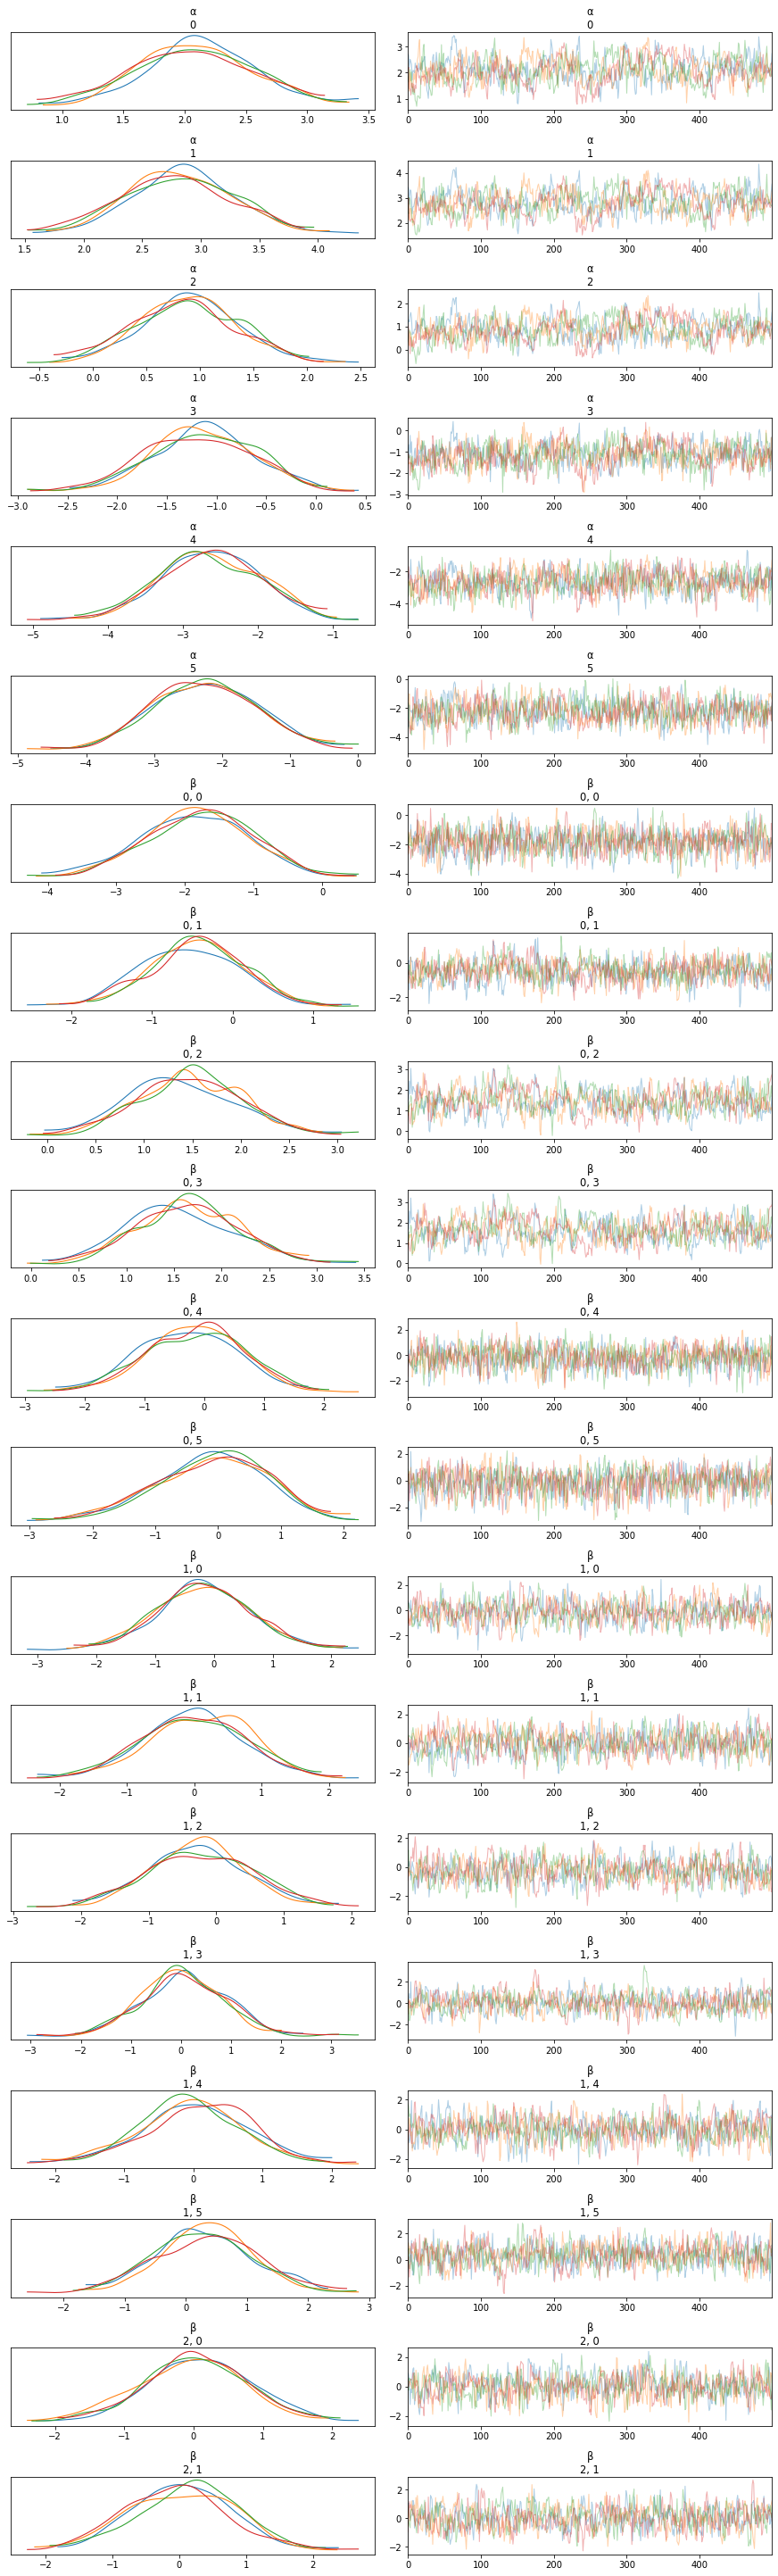

In [17]:
with pm.Model() as logistic_model:
    az.plot_trace(trace)

/Users/kevin/opt/anaconda3/lib/python3.7/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([<AxesSubplot:title={'center':'94.0% HDI'}>], dtype=object)

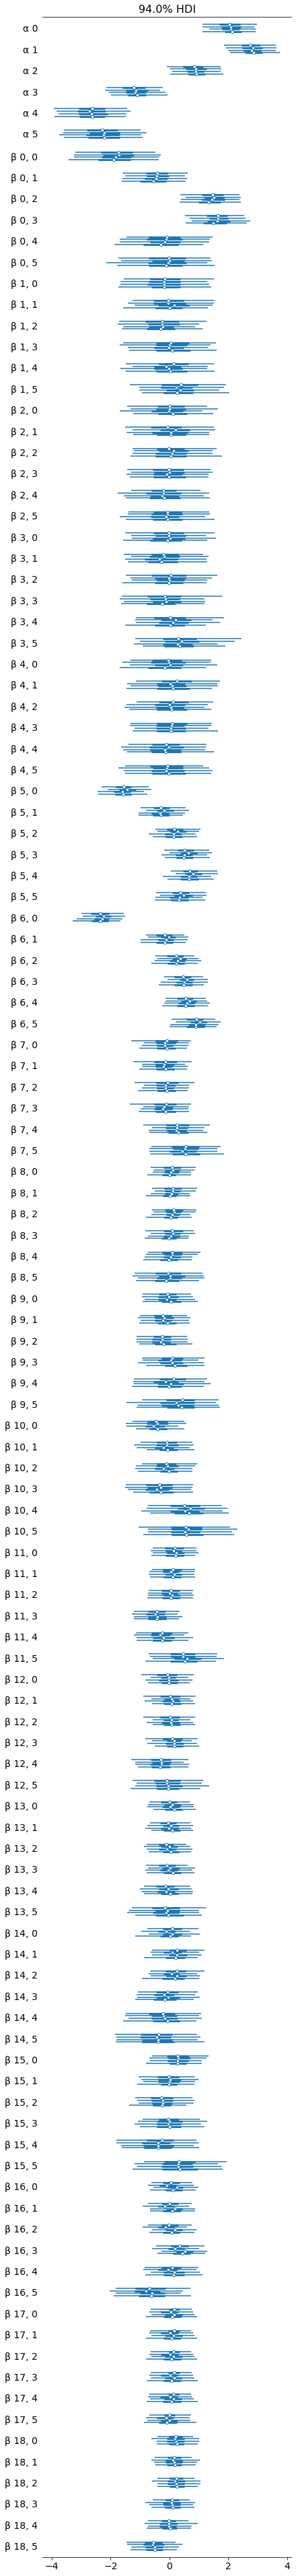

In [18]:
az.plot_forest(trace)

In [22]:
summary_df = pm.summary(trace)
summary_df[~((summary_df['hdi_3%'] < 0) & (summary_df['hdi_97%'] > 0))]

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
α[0],2.094,0.470,1.230,3.005,0.034,0.024,197.0,197.0,198.0,474.0,1.02
α[1],2.818,0.465,1.869,3.609,0.034,0.024,190.0,190.0,192.0,455.0,1.02
α[3],-1.150,0.529,-2.195,-0.239,0.033,0.023,264.0,264.0,266.0,630.0,1.01
α[4],-2.647,0.668,-3.839,-1.372,0.031,0.022,454.0,454.0,455.0,1129.0,1.01
α[5],-2.242,0.752,-3.589,-0.813,0.031,0.022,589.0,589.0,592.0,932.0,1.00
"β[0,0]",-1.805,0.788,-3.255,-0.347,0.026,0.018,926.0,911.0,929.0,1214.0,1.00
"β[0,2]",1.457,0.541,0.454,2.461,0.029,0.021,342.0,342.0,343.0,676.0,1.01
"β[0,3]",1.627,0.541,0.624,2.634,0.029,0.021,342.0,342.0,343.0,743.0,1.00
"β[5,0]",-1.533,0.431,-2.336,-0.727,0.036,0.025,146.0,146.0,146.0,268.0,1.02
"β[5,4]",0.724,0.425,0.023,1.625,0.036,0.025,140.0,140.0,141.0,261.0,1.02


#### Make predictions

In [31]:
with logistic_model:
    pm.model_to_graphviz(logistic_model)

In [52]:
# Predict from trace
with logistic_model:
    print(logistic_model.named_vars)
    pm.set_data({'X_values': X_test, "y_values": y_test})
    model_preds = pm.sample_posterior_predictive(trace, var_names=["y1"], samples=1000)

{'X_train': X_train, 'y_values': y_values, 'α': α, 'β': β, 'y1': y1}
